In [7]:
import pandas as pd
from data.dataset import MyDataset as Dataset

dataset = Dataset("ml-1m")

CUDA available! Setting default tensor type to cuda.FloatTensor
The links parameter aren't initialized!


In [8]:
df = dataset.innerRatingsDF
unique_users = len(df["user"].unique())
unique_items = len(df["item"].unique())

print(f"There are {unique_users} unique users in the dataset")
print(f"There are {unique_items} unique items in the dataset")

There are 6040 unique users in the dataset
There are 3706 unique items in the dataset


In [9]:
average_ratings = df["user"].value_counts().mean()
print(f"Users rate an average of {average_ratings} items in the dataset")

Users rate an average of 165.5973509933775 items in the dataset


In [10]:
df = df.groupby("item").filter(lambda x: len(x) >= 5)
df = df.groupby("user").filter(lambda x: len(x) >= 20)
print(df["item"].value_counts().min())
print(df["user"].value_counts().min())
average_ratings = df["user"].value_counts().mean()
print(f"Users rate an average of {average_ratings} items in the dataset")

4
20
Users rate an average of 165.619884009942 items in the dataset


In [11]:
print(len(df["item"].unique()))
print(len(df["user"].unique()))

3416
6035


In [12]:
import matplotlib.pyplot as plt

print(df["item"].value_counts())
# plt.hist(df['item'].value_counts())
# plt.show()

103     3426
43      2991
124     2990
63      2883
112     2672
        ... 
3409       5
3404       5
3257       5
3612       5
3558       4
Name: item, Length: 3416, dtype: int64


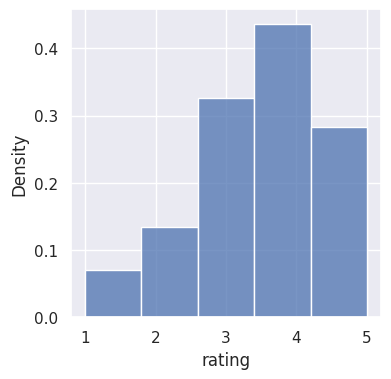

In [27]:
import seaborn as sns

sns.set_style("dark")
sns.set(rc={"figure.figsize": (4, 4)})
g = sns.histplot(df["rating"], bins=5, stat="density")
g.figure.savefig("rating_dist.pdf")

The most commonly rated movie is 103 with 3426 ratings


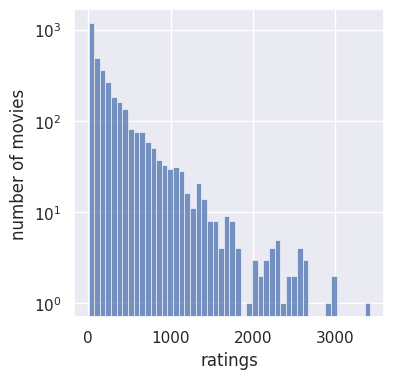

In [45]:
item_counts = df["item"].value_counts()
g = sns.histplot(item_counts, stat="count", bins=50)
g.set_yscale("log")
g.set_ylabel("number of movies")
g.set_xlabel("ratings")
g.figure.savefig("movie_ratings.pdf")
most_common = item_counts.index[0]
value = item_counts.max()
print(f"The most commonly rated movie is {most_common} with {value} ratings")

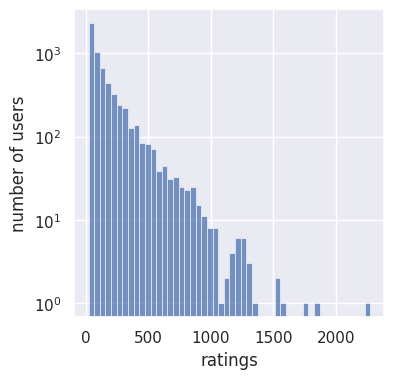

In [44]:
user_counts = df["user"].value_counts()
g = sns.histplot(user_counts, bins=50)
g.set_yscale("log")
g.set_ylabel("number of users")
g.set_xlabel("ratings")
g.figure.savefig("user_ratings.pdf")